# Análise Descritiva dos Dados

## Título:

**Predição de preço de imóveis**

## Membros:

*   Adrisson Rogério Samersla
*   Nickolas Batista Mendonça Machado
*   Thayna Pires Baldão

## Checklist de análises univariadas

*   Classificar os atributos
*   Número de elementos faltantes & distribuição de classes
*   Boxplot/Histograma
*   Média/Desvpad/Mediana/Min/Max/

## Checklist de análises multivariadas

*   Correlação com a saída (e entre si)
*   Heatmap/Scatter plot



## Setup

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')
# dataset_dir = '/content/drive/MyDrive/PO233/dataset'

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.reset_option('max_colwidth')

# Entendendo a Base de Dados

In [3]:
# df = pd.read_csv(dataset_dir + '/reduced-training.csv')
df = pd.read_csv('dataset.csv')
df.shape

(1000000, 24)

In [4]:
df.dtypes

id                           int64
property_id                 object
created_on                  object
operation                   object
property_type               object
place_name                  object
place_with_parent_names     object
country_name                object
state_name                  object
geonames_id                float64
lat_lon                     object
lat                        float64
lon                        float64
currency                    object
surface_total_in_m2        float64
surface_covered_in_m2      float64
floor                      float64
rooms                      float64
expenses                   float64
description                 object
title                       object
image_thumbnail             object
collected_on                object
price                      float64
dtype: object

In [5]:
df.head()

,id,property_id,created_on,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat_lon,lat,lon,currency,surface_total_in_m2,surface_covered_in_m2,floor,rooms,expenses,description,title,image_thumbnail,collected_on,price
0,9641098,9e065715d8b6c69bc930c185901aaf71e3be3d54,2017-04-28,sell,apartment,Campo Belo,|Brasil|São Paulo|São Paulo|Campo Belo|,Brasil,São Paulo,NaN,"-23.616325,-46.67662",-23.616325,-46.676620,BRL,NaN,80.0,NaN,NaN,1065.0,Atualizado em 05/06/2017. O projeto arquitetôn...,"Apartamento com 2 quartos e 2 Suites, São Paul...",https://thumbs4.properati.com/2/tQXG8R8vA-PsM4...,2017-08,900000.0
1,7965368,f6b640522dd15dd3667850718f52aa02516b04ff,2017-05-25,sell,apartment,Porto Alegre,|Brasil|Rio Grande do Sul|Porto Alegre|,Brasil,Rio Grande do Sul,NaN,"-30.05175,-51.182068",-30.051750,-51.182068,BRL,91.0,91.0,NaN,NaN,NaN,"APARTAMENTO com 3 dormitórios , sendo 1 suíte,...",Apartamento em Petrópolis,https://thumbs4.properati.com/6/gy-6GDbU5Ccx_I...,2017-07,750000.0
2,6779668,39a954f5d56137f6fe547af707626eafa6a3869c,2015-06-26,sell,apartment,Bessa,|Brasil|Paraíba|João Pessoa|Bessa|,Brasil,Paraíba,NaN,NaN,NaN,NaN,BRL,NaN,NaN,NaN,NaN,NaN,Edifcio: 10(dez) apartamentos; 01(uma) vaga ga...,Venda Apartamento Joo Pessoa/Paraba: 3 quartos...,https://thumbs4.properati.com/8/DL8fMA8z1oRVgv...,2015-12,235000.0
3,10187959,ae0282c0e20210cfaf030e57edf85b9d5d6c13f4,2016-02-22,sell,apartment,São Lourenço,|Brasil|Paraná|Curitiba|São Lourenço|,Brasil,Paraná,NaN,"-25.413214,-49.271294",-25.413214,-49.271294,BRL,NaN,168.0,NaN,NaN,NaN,Linda cobertura no bairro São Lourenço com uma...,"Linda Cobertura duplex - 168 m² - 2 suítes, 2 ...",https://thumbs4.properati.com/2/J6USW1fALKsXov...,2016-06,880000.0
4,1147630,f83c204dd1baf29c6460826ee829be00f751f676,2016-09-09,sell,house,Vila Formosa,|Brasil|São Paulo|São Paulo|Vila Formosa|,Brasil,São Paulo,NaN,"-23.56229,-46.521248",-23.562290,-46.521248,BRL,NaN,145.0,NaN,2.0,NaN,"Lindo sobrado, muito bem construído com ótimo ...",Sobrado novo para venda na Vila Formosa.,https://thumbs4.properati.com/0/bXqmIc-TKt1wua...,2017-03,580000.0


In [6]:
X = df.drop(columns=['id','property_id'])

In [7]:
X.dtypes

created_on                  object
operation                   object
property_type               object
place_name                  object
place_with_parent_names     object
country_name                object
state_name                  object
geonames_id                float64
lat_lon                     object
lat                        float64
lon                        float64
currency                    object
surface_total_in_m2        float64
surface_covered_in_m2      float64
floor                      float64
rooms                      float64
expenses                   float64
description                 object
title                       object
image_thumbnail             object
collected_on                object
price                      float64
dtype: object

# Tipos de Atributos

## Qualitativos Nominais

In [8]:
pd.unique(X.operation)

array(['sell'], dtype=object)

In [9]:
X.operation.astype('str').value_counts()

sell    1000000
Name: operation, dtype: int64

In [10]:
pd.unique(X.property_type)

array(['apartment', 'house', 'store', 'PH'], dtype=object)

In [11]:
X.property_type.astype('str').value_counts()

apartment    651175
house        318243
store         25142
PH             5440
Name: property_type, dtype: int64

In [12]:
pd.unique(X.place_name)

array(['Campo Belo', 'Porto Alegre', 'Bessa', ..., 'Cipó',
       'Parque São José', 'Feijó'], dtype=object)

In [13]:
X.place_name.astype('str').value_counts()

Praia Grande                46953
Centro                      32584
Santo André                 31783
Porto Alegre                26248
São Paulo                   17527
                            ...  
Residencial Sol Nascente        1
Ipuiúna                         1
Porteiras                       1
São Luiz Gonzaga                1
Parque Bitaru                   1
Name: place_name, Length: 5135, dtype: int64

In [14]:
pd.unique(X.place_with_parent_names)

array(['|Brasil|São Paulo|São Paulo|Campo Belo|',
       '|Brasil|Rio Grande do Sul|Porto Alegre|',
       '|Brasil|Paraíba|João Pessoa|Bessa|', ...,
       '|Brasil|São Paulo|São Bernardo do Campo|Parque São José|',
       '|Brasil|Rio Grande do Norte|Rio do Fogo|Centro|',
       '|Brasil|Acre|Feijó|'], dtype=object)

In [15]:
X.place_with_parent_names.astype('str').value_counts()

|Brasil|São Paulo|Praia Grande|               46869
|Brasil|São Paulo|Santo André|                31722
|Brasil|Rio Grande do Sul|Porto Alegre|       26248
|Brasil|São Paulo|São Paulo|                  14994
|Brasil|São Paulo|São Paulo|Campo Belo|       10527
                                              ...  
|Brasil|São Paulo|Cajamar|Jardim Adelaide|        1
|Brasil|Goiás|Caldas Novas|Nova Vila|             1
|Brasil|Minas Gerais|Ilicínea|                    1
|Brasil|Santa Catarina|Guatambú|                  1
|Brasil|São Paulo|Monteiro Lobato|                1
Name: place_with_parent_names, Length: 6634, dtype: int64

In [16]:
pd.unique(X.country_name)

array(['Brasil'], dtype=object)

In [17]:
X.country_name.astype('str').value_counts()

Brasil    1000000
Name: country_name, dtype: int64

In [18]:
pd.unique(X.state_name)

array(['São Paulo', 'Rio Grande do Sul', 'Paraíba', 'Paraná',
       'Minas Gerais', 'Ceará', 'Rio de Janeiro', 'Espírito Santo',
       'Santa Catarina', 'Bahia', 'Goiás', 'Sergipe',
       'Rio Grande do Norte', 'Pará', 'Distrito Federal', 'Alagoas',
       'Mato Grosso', 'Pernambuco', 'Tocantins', 'Mato Grosso do Sul',
       'Amazonas', 'Piauí', 'Maranhão', 'Rondônia', 'Amapá', 'Acre',
       'Outros países', 'Roraima'], dtype=object)

In [19]:
X.state_name.astype('str').value_counts()

São Paulo              704145
Rio Grande do Sul       90626
Rio de Janeiro          71693
Santa Catarina          27613
Minas Gerais            27401
Paraná                  18083
Ceará                   11472
Espírito Santo          11056
Paraíba                 10599
Bahia                    8578
Rio Grande do Norte      4981
Goiás                    2929
Pernambuco               2645
Distrito Federal         2300
Pará                     1346
Mato Grosso               899
Amazonas                  831
Tocantins                 714
Alagoas                   610
Maranhão                  568
Sergipe                   314
Mato Grosso do Sul        190
Rondônia                  139
Amapá                     123
Piauí                     123
Acre                       16
Outros países               4
Roraima                     2
Name: state_name, dtype: int64

In [20]:
pd.unique(X.currency)

array(['BRL', 'MXN', 'USD', 'COP'], dtype=object)

In [21]:
X.currency.astype('str').value_counts()

BRL    999806
MXN       103
USD        87
COP         4
Name: currency, dtype: int64

In [22]:
pd.unique(X.description)

array(['Atualizado em 05/06/2017. O projeto arquitetônico do apartamento oferece a privacidade e segurança tão desejadas. O Edifício foi idealizado para proporcionar instalações modernas, belas, seguras e funcionais para seus moradores. A área de lazer completíssima em ambientes agradáveis e espaçosos. Apartamento com 2 dormitórios, ambos suítes, 2 vagas e depósito.',
       'APARTAMENTO com 3 dormitórios , sendo 1 suíte,living amplo bem iluminado e com linda vista definida, churrasqueira na cozinha e área de serviço separada. Porcelanato no living e laminado na parte íntima.Prédio com salão de festas e churrasqueira.3 vagas, box duplo 701 e box 714.Ficam os móveis sob medida.   ',
       'Edifcio: 10(dez) apartamentos; 01(uma) vaga garagem por mentos:* Trreo 1: Sala nica para 2 ambientes, solarium, 3 quartos sendo 1 sute, wc social, cozinha e rea de servio. Garagem coberta. rea Privativa de 69,70m2.* Trreo 2: Sala nica para 2 ambientes, solarium, 3 quartos sendo 1 sute, wc social, coz

In [23]:
pd.unique(X.title)

array(['Apartamento com 2 quartos e 2 Suites, São Paulo, Campo Belo, por R$ 900.000',
       'Apartamento em Petrópolis',
       'Venda Apartamento Joo Pessoa/Paraba: 3 quartos, 1 sute, 1 vaga',
       ...,
       'Apartamento , 04 dormitórios (2 suítes) para venda em Riviera de São Lourenço, Bertioga, São Paulo: ',
       'Casa com 5 quartos e Copa na AV BRIGADEIRO LUÍS ANTÔNIO, São Paulo, Jardim Paulista, por R$ 1.800.000',
       'Excelente apartamento com 4 quartos, sendo 2 suítes. 2 vagas. Le Parc para venda e locação, Paralela, Salvador.'],
      dtype=object)

In [24]:
pd.unique(X.image_thumbnail)

array(['https://thumbs4.properati.com/2/tQXG8R8vA-PsM4MAI1hFlybtdRA=/trim/198x0/smart/filters:strip_icc()/images2.brbrokers.com.br/CRM/792358/Medium42811.6809732523_4b941592fdfa45f0816969067ff8cab3.jpg',
       'https://thumbs4.properati.com/6/gy-6GDbU5Ccx_IN7vnSWlJuZEP0=/trim/198x0/smart/filters:strip_icc()/www.imoobe.com.br/vista.imobi/fotos/381736/iimoobe11381736_11750.jpg',
       'https://thumbs4.properati.com/8/DL8fMA8z1oRVgvmeyVNlGiP51E0=/trim/198x0/smart/filters:strip_icc()/img.bemdireto.com.br/users/s_7873p/imovel/s_800n3/74933_1415702830097_o.jpg',
       ...,
       'https://thumbs4.properati.com/5/YcgXsscft5LbhzWIqvYrjS7vz4o=/trim/198x0/smart/filters:strip_icc()/www.lvimobiliaria.com.br/exportacao/fotos/5550.jpg',
       'https://thumbs4.properati.com/1/RM6-TFL_5qWVHbZUG3QuSKIqJjU=/trim/198x0/smart/filters:strip_icc()/www.imobiliarianobilitare.com.br/vista.imobi/fotos/imoveis/36862585.jpg',
       'https://thumbs4.properati.com/1/cUUkwPE3W9ubYL9-JSW0xLy-2KY=/trim/198x0/smar

## Qualitativos ordinais

## Quantitativos Intervalares

In [25]:
pd.unique(X.created_on)

array(['2017-04-28', '2017-05-25', '2015-06-26', ..., '2015-03-06',
       '2014-07-06', '2018-01-16'], dtype=object)

In [26]:
pd.unique(X.collected_on)

array(['2017-08', '2017-07', '2015-12', '2016-06', '2017-03', '2015-03',
       '2017-02', '2017-10', '2015-07', '2016-02', '2016-07', '2015-10',
       '2017-11', '2016-01', '2016-09', '2015-02', '2015-04', '2018-01',
       '2017-06', '2017-09', '2016-08', '2015-06', '2017-01', '2016-12',
       '2015-08', '2016-10', '2015-11', '2016-04', '2017-05', '2017-12',
       '2016-11', '2016-05', '2015-05', '2016-03', '2015-09', '2017-04',
       '2018-02', '2015-01'], dtype=object)

In [27]:
X.describe()

,geonames_id,lat,lon,surface_total_in_m2,surface_covered_in_m2,floor,rooms,expenses,price
count,0.0,496143.000000,496146.000000,241728.000000,7.615710e+05,4.369000e+04,657161.000000,3.333320e+05,1.000000e+06
mean,NaN,-23.681619,-46.750357,338.202885,3.026068e+03,1.603409e+04,1.990888,2.236413e+03,8.548888e+05
std,NaN,4.374563,3.185936,2763.691714,2.460865e+06,3.348937e+06,1.495585,5.048509e+04,1.604411e+06
min,NaN,-34.337131,-119.417932,0.000000,0.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.700000e+04
25%,NaN,-23.711691,-47.060104,72.000000,6.500000e+01,3.000000e+00,1.000000,3.500000e+02,3.070000e+05
50%,NaN,-23.593937,-46.655800,125.000000,9.900000e+01,5.000000e+00,2.000000,5.650000e+02,5.000000e+05
75%,NaN,-23.271093,-46.502373,245.000000,1.700000e+02,1.000000e+01,2.000000,9.500000e+02,9.000000e+05
max,NaN,36.778261,0.002000,200000.000000,2.147484e+09,7.000000e+08,40.000000,9.691000e+06,2.600000e+08


## Quantitativos Racionais

In [28]:
pd.unique(X.lat_lon)

array(['-23.616325,-46.67662', '-30.05175,-51.182068', nan, ...,
       '-22.9658687,-47.0709945', '-23.6093644,-46.872209',
       '-29.9482021332,-50.996219635'], dtype=object)

# Análises Univariadas

# Análises Multivariadas

In [29]:
df.geonames_id.astype('str').value_counts()

nan    1000000
Name: geonames_id, dtype: int64

In [30]:
X.expenses.astype('str').value_counts()

nan         666668
500.0         9465
600.0         8881
350.0         8863
400.0         8813
             ...  
2837.0           1
1968.0           1
145000.0         1
1886.0           1
3130.0           1
Name: expenses, Length: 3873, dtype: int64

In [31]:
X.floor.dropna().value_counts()

1.0        5331
2.0        5310
3.0        4546
4.0        3588
5.0        3112
           ... 
30000.0       1
143.0         1
240.0         1
3400.0        1
1131.0        1
Name: floor, Length: 230, dtype: int64

In [32]:
X.lat.astype('str').value_counts()

nan                    503857
-30.0                    4808
-23.0                    4520
-26.985996000000004      2097
-25.0                    1947
                        ...  
-22.921535100000003         1
-22.9327818                 1
-23.466127                  1
-24.0122672                 1
-25.41252136                1
Name: lat, Length: 100369, dtype: int64

In [33]:
df.isnull().sum()*100/1_000_000

id                           0.0000
property_id                  0.0000
created_on                   0.0000
operation                    0.0000
property_type                0.0000
place_name                   0.0000
place_with_parent_names      0.0000
country_name                 0.0000
state_name                   0.0000
geonames_id                100.0000
lat_lon                     50.3857
lat                         50.3857
lon                         50.3854
currency                     0.0000
surface_total_in_m2         75.8272
surface_covered_in_m2       23.8429
floor                       95.6310
rooms                       34.2839
expenses                    66.6668
description                  0.0001
title                        0.0000
image_thumbnail              2.8477
collected_on                 0.0000
price                        0.0000
dtype: float64

In [34]:
X.surface_total_in_m2.astype('str').value_counts()

nan        758272
0.0         13598
300.0        3986
250.0        3302
100.0        3252
            ...  
1479.0          1
16980.0         1
1646.0          1
6860.0          1
22813.0         1
Name: surface_total_in_m2, Length: 2471, dtype: int64

In [35]:
X.surface_covered_in_m2.astype('str').value_counts()

nan         238429
70.0         17861
60.0         16373
50.0         15073
80.0         13525
             ...  
2052.0           1
4140.0           1
166315.0         1
818.0            1
3149.0           1
Name: surface_covered_in_m2, Length: 1803, dtype: int64

In [36]:
Xnumeric = X.select_dtypes(include=['int64', 'float64'])
Xnumeric = Xnumeric.drop(columns = ['geonames_id'])

In [37]:
Xnumeric.shape

(1000000, 8)

In [38]:
Xnumeric.corr()

,lat,lon,surface_total_in_m2,surface_covered_in_m2,floor,rooms,expenses,price
lat,1.000000,0.576157,0.040662,-0.000099,-0.067876,0.067482,-0.000692,0.015471
lon,0.576157,1.000000,0.035675,-0.000057,-0.068874,0.043277,0.003794,0.050500
surface_total_in_m2,0.040662,0.035675,1.000000,0.095252,0.374468,0.012484,0.011133,0.113595
surface_covered_in_m2,-0.000099,-0.000057,0.095252,1.000000,0.010081,0.002791,0.002196,-0.000159
floor,-0.067876,-0.068874,0.374468,0.010081,1.000000,-0.005793,NaN,-0.001662
rooms,0.067482,0.043277,0.012484,0.002791,-0.005793,1.000000,0.011541,0.256405
expenses,-0.000692,0.003794,0.011133,0.002196,NaN,0.011541,1.000000,0.026419
price,0.015471,0.050500,0.113595,-0.000159,-0.001662,0.256405,0.026419,1.000000


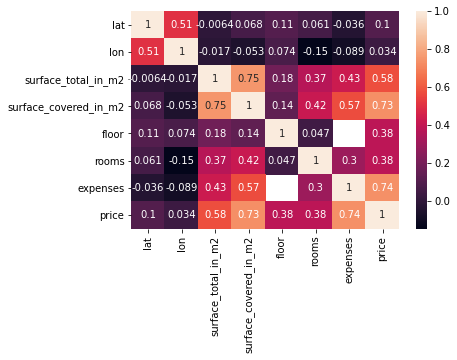

In [43]:
plot = sns.heatmap(Xnumeric.corr(method='spearman'), annot=True)

In [44]:
plot.figure.tight_layout()

In [46]:
plot.figure.savefig('heatmap.eps')